## ALGORITMOS DE APRENDIZAJE NO SUPERVISADO

## ESTUDIANTE : LUISA FERNANDA ANACONA TAQUE

In [47]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
import plotly.express as px 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [49]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#ANALISIS EXPLORATORIO

In [51]:
#tamaño del dataset
dataset.shape

(200, 5)

In [53]:
#Eliminar una columna del dataset
data=dataset.drop(['CustomerID'], axis=1)

In [55]:
#Comprobar si se elimino la columna
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [57]:
# Reemplazar 'Male' con un valor numérico específico, como 0
data= data.replace('Male', 0)

In [59]:
# Reemplazar 'Female' con un valor numérico específico, como 1
data= data.replace('Female', 1)

In [89]:
print (data)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137                      18
199       0   30                 137                      83

[200 rows x 4 columns]


In [61]:
#sacar datos estadisticos del dataset (media, desviación estándar,...)
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [63]:
#cantidad de valores nulos en el dataset
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [67]:
#matriz de correlación (relación entre las variables)
corr_matrix =data.corr()
corr_matrix

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


<Axes: >

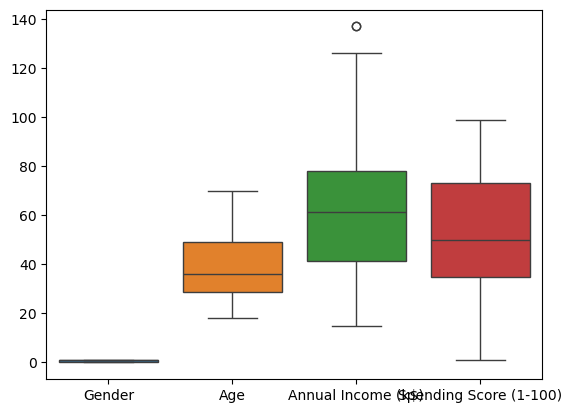

In [69]:
#Diagrama de caja para cada variable por especie
sns.boxplot(data=data)

In [85]:
#Revision de datos con registros en 0
print ("Cantidad de Registros con cero en Edad: ",data['Age'].isin([0]).sum())
print ("Cantidad de Registros con cero en Salario: ",data['Annual Income (k$)'].isin([0]).sum())
print ("Cantidad de Registros con cero en Score: ",data['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Salario:  0
Cantidad de Registros con cero en Score:  0


In [106]:
#Conteo de datos Atipicos
nivel_minimo=1
nivel_maximo=100
Total_Atipicos=((data['Spending Score (1-100)']<nivel_minimo)|(data['Spending Score (1-100)']<nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [108]:
#Conteo de datos Atipicos
nivel_minimo=1
nivel_maximo=100
Total_Atipicos=((data['Annual Income (k$)']<nivel_minimo)|(data['Annual Income (k$)']<nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [100]:
#Filtrar datos Atipicos
data=data[(data['Spending Score (1-100)']<nivel_maximo)&(data['Spending Score (1-100)']<nivel_minimo)]

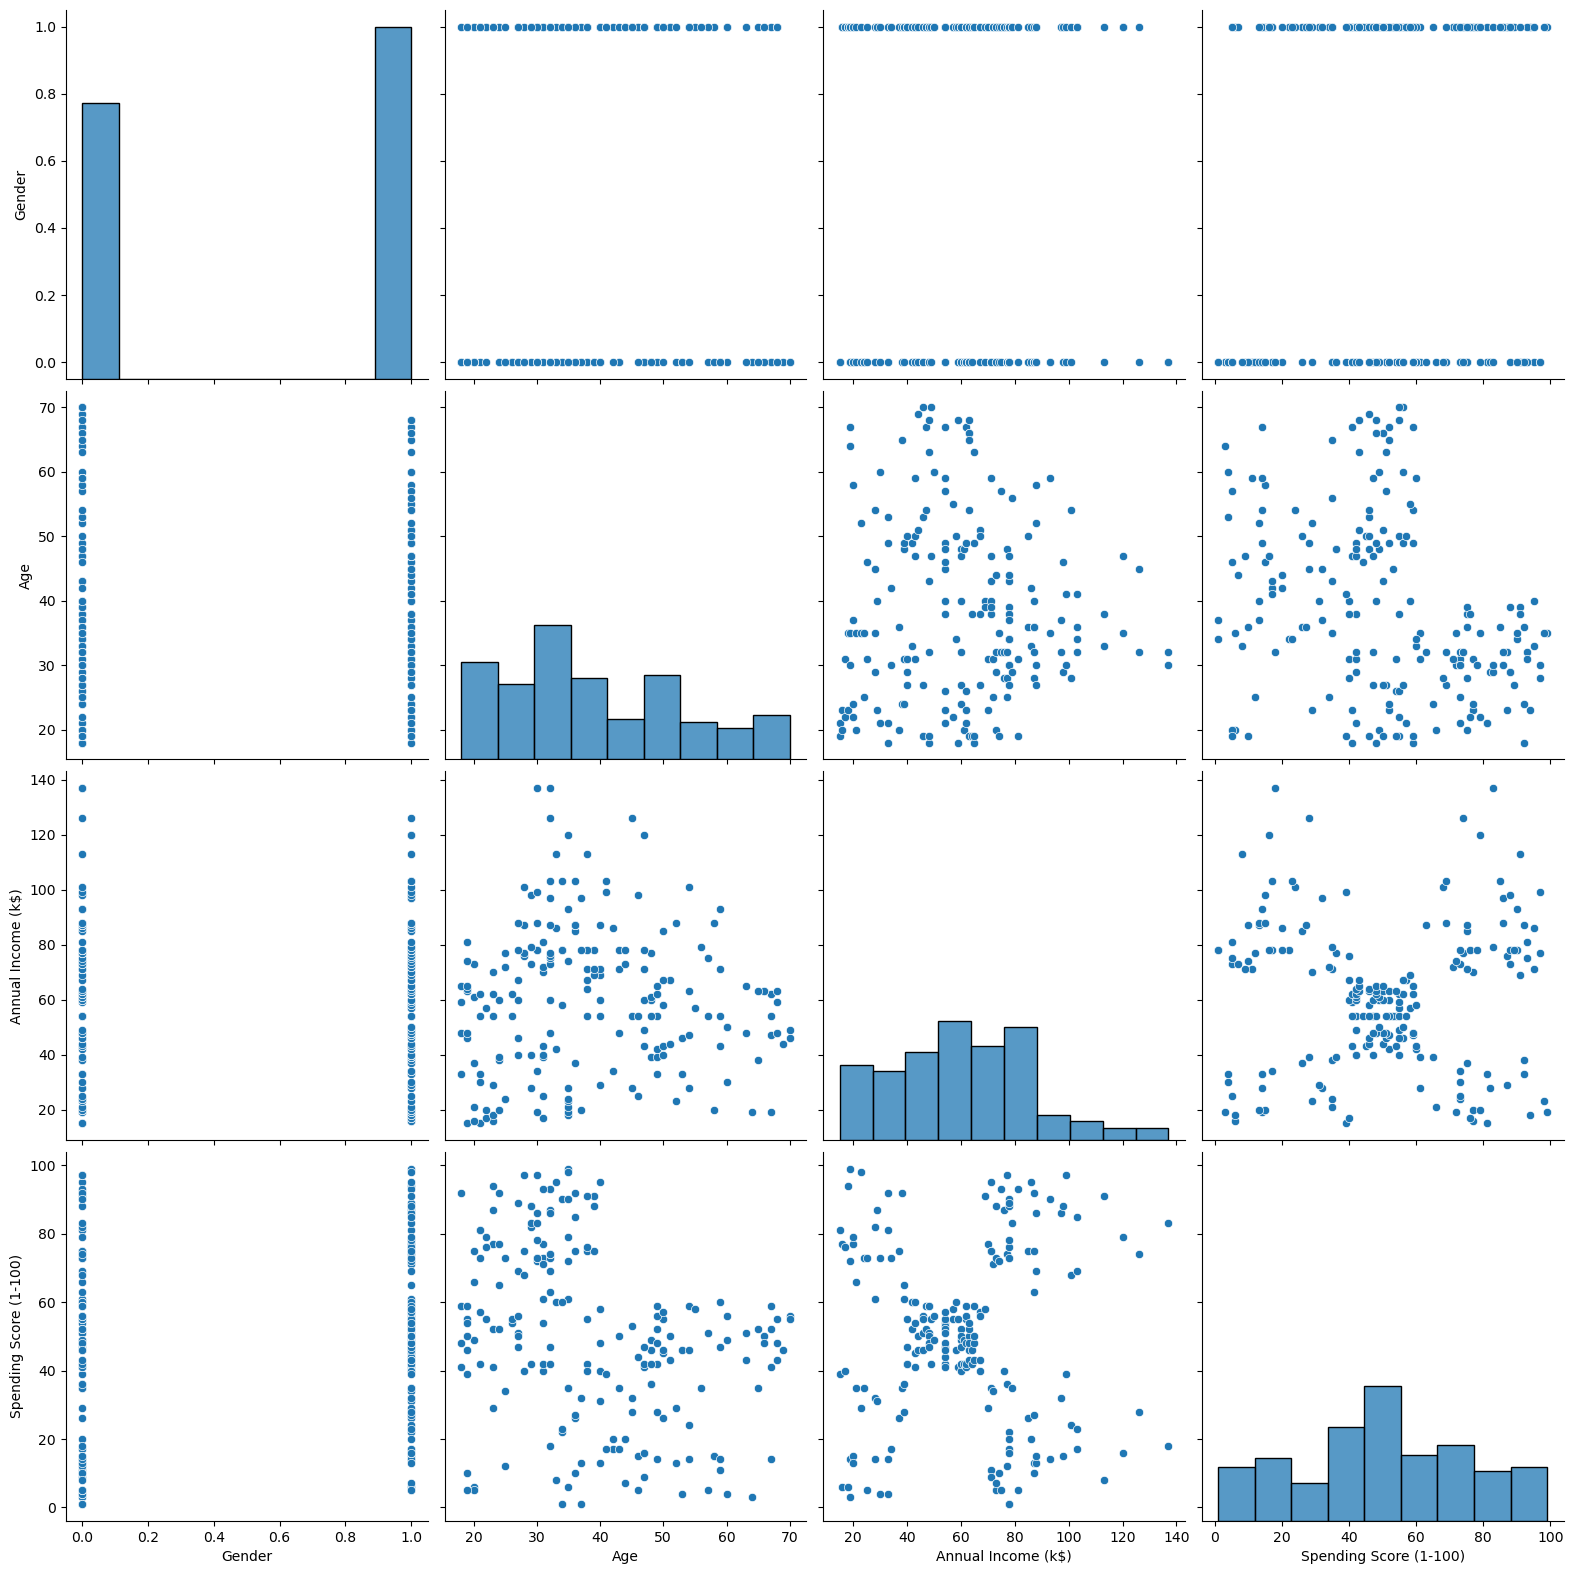

In [65]:
#diagrama de dispersión
sns.pairplot(data.dropna(), size =4,kind='scatter')

In [156]:
#ALGORITMO KMEANS

# Asegúrate de que 'data' contiene datos válidos antes de usarlo.
print(dataset.shape)  # Verifica el número de filas y columnas


(200, 5)


In [158]:
# Rango de números de clústeres a probar
Nc = range(1, 10)

In [146]:
# Lista de modelos KMeans con diferentes valores de n_clusters
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [168]:
# Obtener la inercia para cada número de clústeres
inertia = [kmeans[i].fit(dataset).inertia_ for i in range(len(kmeans))]

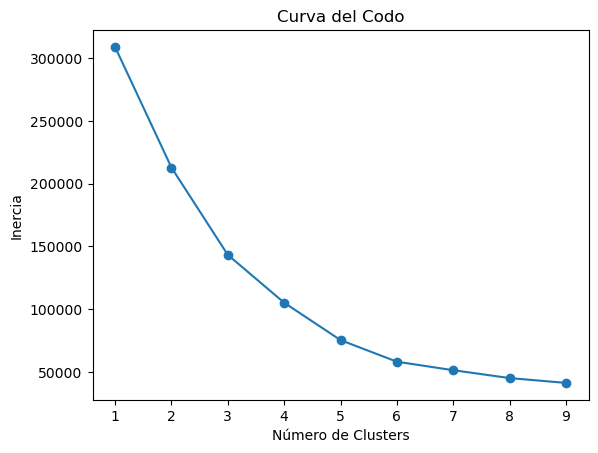

In [170]:
# Graficar la curva del codo (Elbow Curve)
plt.plot(Nc, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Curva del Codo')
plt.show()

In [231]:
#Generació del modelo de agrupamiento del modelo con k =7 (se haran 7 grupos de agrupamiento)
Modelo=KMeans(n_clusters=7,random_state=0)
Modelo.fit(dataset)


KMeans(n_clusters=7, random_state=0)

In [235]:
#Se agrega la columna GRUPO a la BD para identificar el numero de grupo del agrupamiento
Modelo.labels_
dataset["Grupo"] =Modelo.labels_
print(dataset)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      5
2     20                  16                       6      2
3     23                  16                      77      5
4     31                  17                      40      2
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


In [237]:
#Desempeño del modelo con el coeficiente de Silhouette el Indice de Calinski-Harabasz y el índice de Davies Bouldin Score

#Prepación de la metrica de la columna Grupo
Observaciones = len(dataset)
X=dataset.drop('Grupo',axis=1)
clusters =dataset['Grupo']


In [239]:
#Se calculan las métricas
sil_score =silhouette_score(X,clusters)
calinski_score = calinski_harabasz_score (X,clusters)
davies_score = davies_bouldin_score (X,clusters)

In [241]:
#Se crea una tabla para mostrar los valores de las métricas
table_data=[
["Numero de Obvservaciones", Observaciones],
["Coeficiente Silhouette", sil_score],
["Indice Calinkski Harabsz",calinski_score],
["Indice Davies Bouldin", davies_score]
]

In [243]:
#Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric","Values"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Values       |
+--------------------------+--------------------+
| Numero de Obvservaciones |        200         |
|  Coeficiente Silhouette  | 0.4375126798637538 |
| Indice Calinkski Harabsz | 160.60272189943905 |
|  Indice Davies Bouldin   | 0.8307790832386803 |
+--------------------------+--------------------+


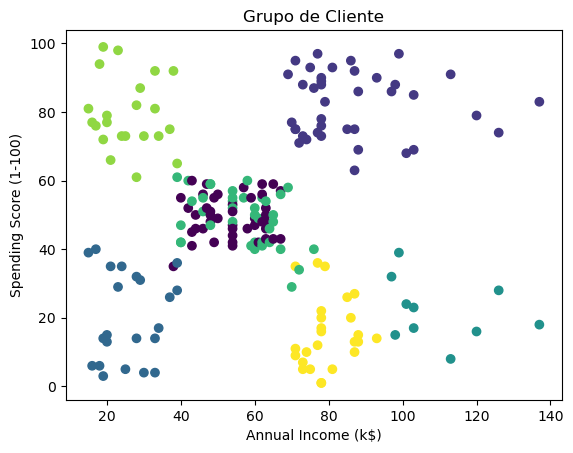

In [245]:
#Graficas para visualizar los resultados del modelo
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'],c =dataset['Grupo'],cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title ('Grupo de Cliente')
plt.show()

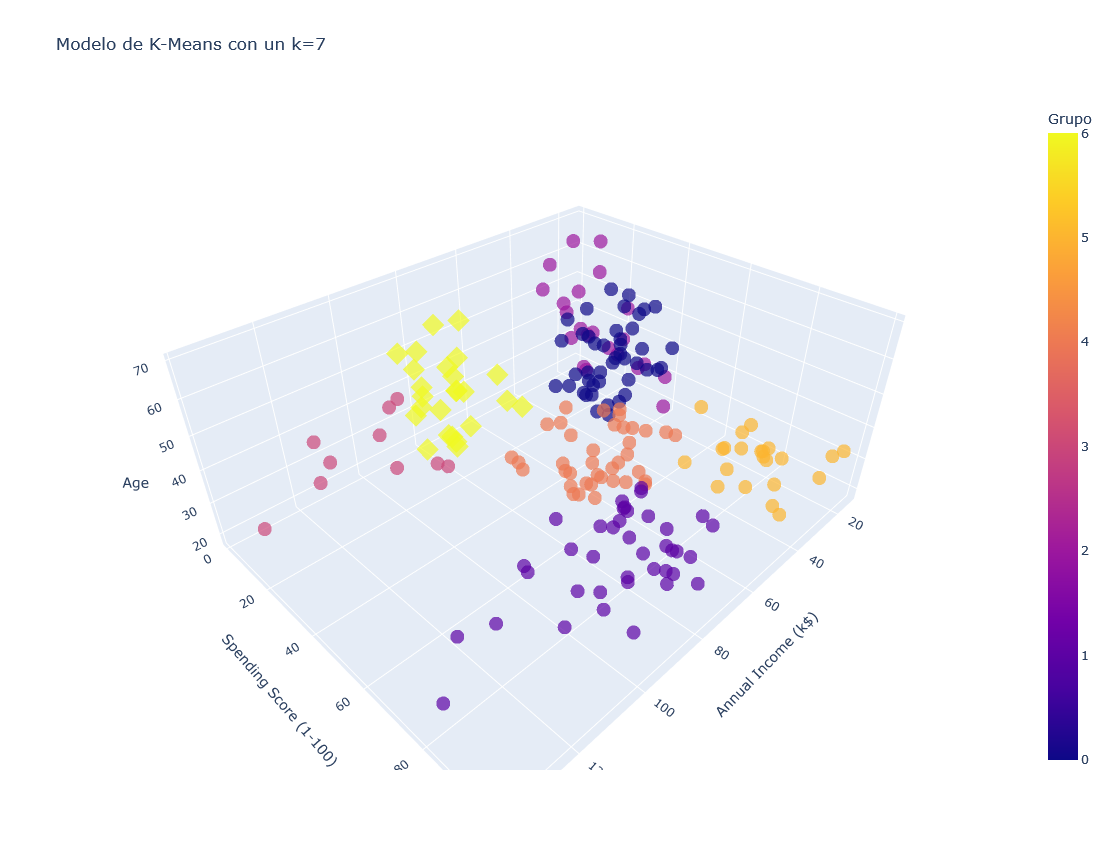

In [247]:
#Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(dataset, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0:'circle',1:'circle',2:'circle',3:'circle',4:'circle',5:'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={7}', labels={'label':'Cluster'},color_discrete_map={})
Grafica_3D.update_layout(showlegend=False)